In [1]:
import xarray as xr
xr.set_options(display_style='html')
import intake
import cftime
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset
from matplotlib.colors import LogNorm
import cartopy.crs as ccrs
import cartopy
import matplotlib.path as mpath

In [2]:
AR_crit = xr.open_dataset('../2014_AR_detection_p91.nc')
test_val = AR_crit.ivt

In [3]:
count=0

test_val = xr.where(AR_crit.lat<60,0,AR_crit.ivt)

for tt in range(len(AR_crit.time)):
    df_loc = test_val[:,tt,:]
    ll = plt.contour(df_loc,levels=[0,1])
    plt.close()
    for item in ll.collections:
        for i in item.get_paths():
             count = count+1
                
print(count)

/tmp/ipykernel_2842/7919376.py:7: UserWarning: No contour levels were found within the data range.
  ll = plt.contour(df_loc,levels=[0,1])


291


In [4]:
count=0

test_val = xr.where(AR_crit.lat>-60,0,AR_crit.ivt)

for tt in range(len(AR_crit.time)):
    df_loc = test_val[:,tt,:]
    ll = plt.contour(df_loc,levels=[0,1])
    plt.close()
    for item in ll.collections:
        for i in item.get_paths():
             count = count+1
                
print(count)

/tmp/ipykernel_2842/964404628.py:7: UserWarning: No contour levels were found within the data range.
  ll = plt.contour(df_loc,levels=[0,1])


339


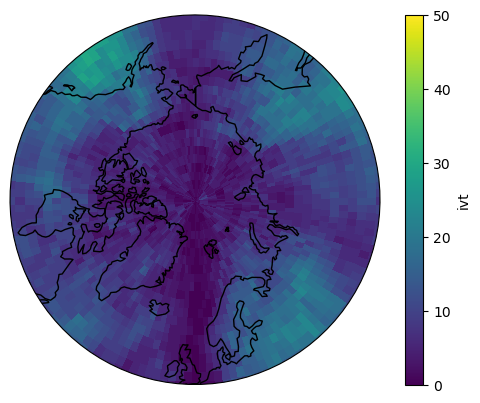

In [5]:
ax2 = plt.subplot(1,1,1,projection=ccrs.NorthPolarStereo())
ax2.set_extent([-180,180,50,90], ccrs.PlateCarree())
ax2.add_feature(cartopy.feature.LAND,edgecolor='k',zorder=4,facecolor=(0.5,0.5,0.5,0))
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax2.set_boundary(circle, transform=ax2.transAxes)

xr.plot.pcolormesh(AR_crit.ivt.sum(dim='time'),transform=ccrs.PlateCarree(),vmax=50)

plt.show()

In [6]:
wille = xr.open_dataset('../../../data/AR_detection_2020.nc4')
wille

<xarray.Dataset>
Dimensions:        (time: 2928, lat: 361, lon: 576)
Coordinates:
  * lat            (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon            (lon) float64 -180.0 -179.4 -178.8 ... 178.1 178.8 179.4
  * time           (time) datetime64[ns] 2020-01-01 ... 2020-12-31T21:00:00
Data variables:
    ar_binary_tag  (time, lat, lon) int8 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.0rc2 (https://mpimet.mpg...
    Conventions:  CF-1.6
    description:  ARTMIP file format (Ullrich)
    history:      Tue May  3 12:22:37 2022: ncks -4 -L 1 temp_MERRA2.ar_tag.W...
    NCO:          netCDF Operators version 5.0.6 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 2.0.0rc4 (https://mpimet.mpg...

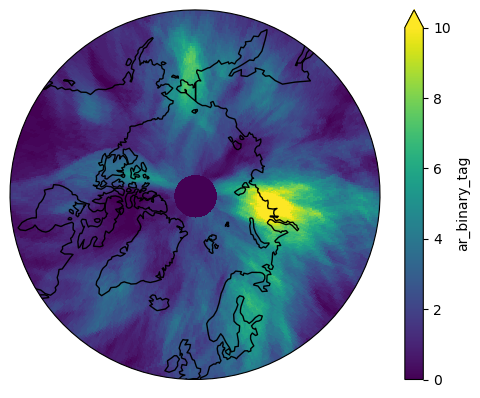

In [7]:
ax1 = plt.subplot(1,1,1,projection=ccrs.NorthPolarStereo())
ax1.set_extent([-180,180,50,90], ccrs.PlateCarree())
ax1.add_feature(cartopy.feature.LAND,edgecolor='k',zorder=4,facecolor=(0.5,0.5,0.5,0))
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax1.set_boundary(circle, transform=ax1.transAxes)

xr.plot.pcolormesh(wille.ar_binary_tag.sum(dim='time')/8,transform=ccrs.PlateCarree(),vmax=10)
plt.show()

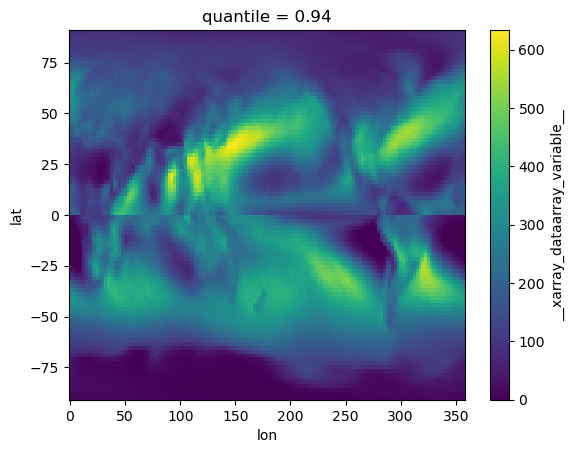

In [8]:
AR_crit = xr.open_dataset('../q94_2000.nc')
test_val = AR_crit['__xarray_dataarray_variable__']
xr.plot.pcolormesh(test_val)

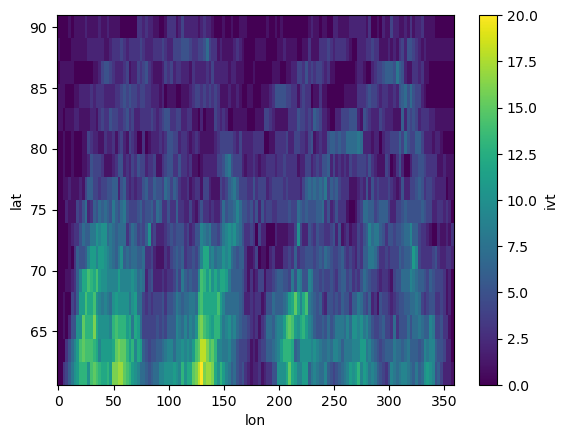

In [9]:
AR_crit = xr.open_dataset('../2014_AR_detection_p92.nc')
test_val = AR_crit.ivt.sel(lat=slice(60,90))

xr.plot.pcolormesh(test_val.sum(dim='time'))